# **Reto 2**
---

## **Importación de librerías**
---

In [1]:
import pandas as pd
import numpy as np
from keras.datasets import fashion_mnist
from moviepy.editor import VideoFileClip
from IPython.display import display
import cv2
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Video referencia de ecocardiografía**
---

In [3]:
# Ruta al archivo .avi
ruta_archivo_avi = '/content/drive/Shareddrives/TC2007B Team 2 Bravo/Blue Leg/Videos incompletos/0X1A0A263B22CCD966.avi'

# Cargar el archivo .avi usando moviepy
video = VideoFileClip(ruta_archivo_avi)

# Mostrar el video en el entorno de Colab
display(video.ipython_display(width=400))

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


## **Carga del archivo con los Frames de las máscaras**
---

In [4]:
#Cargar el dataframe
df = pd.read_csv("/content/drive/Shareddrives/TC2007B Team 2 Bravo/Blue Leg/VolumeTracings.csv")
df.head()

,FileName,X1,Y1,X2,Y2,Frame
0,0X100009310A3BD7FC.avi,51.260417,15.348958,64.932292,69.125000,46
1,0X100009310A3BD7FC.avi,50.037611,17.167841,53.367222,16.321330,46
2,0X100009310A3BD7FC.avi,49.157378,20.407629,57.090549,18.390722,46
3,0X100009310A3BD7FC.avi,48.538173,23.581055,59.997339,20.667707,46
4,0X100009310A3BD7FC.avi,47.918968,26.754480,62.904129,22.944693,46


In [5]:
#Extraer los frames de la máscara de un archivo
df_archivo = df[df["FileName"]=="0X1A0A263B22CCD966.avi"]
df_archivo.head()

,FileName,X1,Y1,X2,Y2,Frame
34179,0X1A0A263B22CCD966.avi,46.520833,21.729167,63.656250,65.479167,72
34180,0X1A0A263B22CCD966.avi,46.225063,23.232668,47.790771,22.619432,72
34181,0X1A0A263B22CCD966.avi,45.633521,26.239669,50.330645,24.399962,72
34182,0X1A0A263B22CCD966.avi,45.041980,29.246671,52.870519,26.180493,72
34183,0X1A0A263B22CCD966.avi,44.450439,32.253673,55.410394,27.961023,72


In [6]:
#Extraer los frames específicos para ese archivo
frames = df_archivo["Frame"].unique()
frames

array([72, 83])

In [7]:
df_archivo["Frame"].value_counts()

72    21
83    21
Name: Frame, dtype: int64

Frame 72:


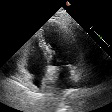

Frame 83:


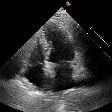

In [8]:
#Extraer los frames del archivo
cap = cv2.VideoCapture(ruta_archivo_avi)
frames_imgs = []

# Check if the video file is loaded
if not cap.isOpened():
    print("Error: Couldn't open the video file.")
else:
    # Extract specific frames
    for frame_number in frames:
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number-1)  # Setting the video position
        ret, frame = cap.read()

        if ret:
            # Display the frame
            print(f"Frame {frame_number}:")
            frames_imgs.append(frame)
            cv2_imshow(frame)
        else:
            print(f"Error: Couldn't extract frame {frame_number}.")

    # Release the video capture object
    cap.release()


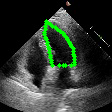

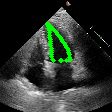

In [9]:
import cv2
import pandas as pd
from google.colab.patches import cv2_imshow
import os

# Load the dataset containing frame information
dataset_path = '/content/drive/Shareddrives/TC2007B Team 2 Bravo/Blue Leg/VolumeTracings.csv'
dataset = pd.read_csv(dataset_path)

# Specify the video file you want to process
video_folder = '/content/drive/Shareddrives/TC2007B Team 2 Bravo/Blue Leg/Videos incompletos'
video_filename = '0X1A0A263B22CCD966.avi'

# Filter the dataset for the specific video and frames (46 and 61)
frame_72_dataset = dataset[(dataset['FileName'] == video_filename) & (dataset['Frame'] == 72)]
frame_83_dataset = dataset[(dataset['FileName'] == video_filename) & (dataset['Frame'] == 83)]

# Check if the video file exists
video_path = os.path.join(video_folder, video_filename)
if not os.path.exists(video_path):
    print(f"Error: Video file {video_path} not found.")
else:
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"Error: Couldn't open the video file {video_path}")
    else:
        cap.set(cv2.CAP_PROP_POS_FRAMES, 71)
        ret, frame_72 = cap.read()

        if not ret:
            print(f"Error: Couldn't extract frame 72 from {video_path}")
        else:
            for index, row in frame_72_dataset.iterrows():
                x, y = int(row['X1']), int(row['Y1'])
                cv2.circle(frame_72, (x, y), 2, (0, 255, 0), -1)  # Green circle
                x2, y2 = int(row['X2']), int(row['Y2'])
                cv2.circle(frame_72, (x2, y2), 2, (0, 255, 0), -1)

        cap.set(cv2.CAP_PROP_POS_FRAMES, 82)
        ret, frame_83 = cap.read()

        if not ret:
            print(f"Error: Couldn't extract frame 83 from {video_path}")
        else:
            for index, row in frame_83_dataset.iterrows():
                x, y = int(row['X1']), int(row['Y1'])
                cv2.circle(frame_83, (x, y), 2, (0, 255, 0), -1)
                x2, y2 = int(row['X2']), int(row['Y2'])
                cv2.circle(frame_83, (x2, y2), 2, (0, 255, 0), -1)

            # Display frames 46 and 61 with the traced points
            cv2_imshow(frame_72)
            cv2_imshow(frame_83)

        # Release the video capture object
        cap.release()


## **Generación y evaluación de 10 máscaras diferentes**

---


---

In [10]:
def mask_generation(filename, frames, video_folder):
  if filename[0:5] == "Copia":
    filename_df = filename.replace("Copia de ","")
  else:
    filename_df = filename

  # Obtener los frames que cuentan con las máscaras
  frame_A = df[(df['FileName'] == filename_df) & (df['Frame'] == frames[0])]
  frame_B = df[(df['FileName'] == filename_df) & (df['Frame'] == frames[1])]

  # Conseguir el video
  video_path = os.path.join(video_folder, filename)
  if not os.path.exists(video_path):
      print(f"Error: Video {video_path} no encontrado.")
  else:
      # Abrir el video
      cap = cv2.VideoCapture(video_path)

      if not cap.isOpened():
          print(f"Error: No se pudo abrir el archivo: {video_path}")
      else:
          cap.set(cv2.CAP_PROP_POS_FRAMES, frames[0]-1)
          ret, frame_Aimg = cap.read()

          # Obtén las dimensiones del frame
          alto_frame, ancho_frame, _ = frame_Aimg.shape

          # Crea un cuadro negro del mismo tamaño que el frame
          cuadro_negroA = np.zeros((alto_frame, ancho_frame, 3), dtype=np.uint8)
          cuadro_negroA[:] = (0, 0, 0)

          if not ret:
              print(f"Error: No se pudo extraer el frame de {video_path}")
          else:
              for index, row in frame_A.iterrows(): #Marcar los puntos
                  x, y = int(row['X1']), int(row['Y1'])
                  x2, y2 = int(row['X2']), int(row['Y2'])
                  cv2.line(cuadro_negroA,(x,y),(x2,y2),(255,255,255),5)

          cap.set(cv2.CAP_PROP_POS_FRAMES, frames[1]-1)
          ret, frame_Bimg = cap.read()

          # Obtén las dimensiones del frame
          alto_frame, ancho_frame, _ = frame_Bimg.shape

          # Crea un cuadro negro del mismo tamaño que el frame
          cuadro_negroB = np.zeros((alto_frame, ancho_frame, 3), dtype=np.uint8)
          cuadro_negroB[:] = (0, 0, 0)

          if not ret:
              print(f"Error: No se pudo extraer el frame de {video_path}")
          else:
              for index, row in frame_B.iterrows():
                  x, y = int(row['X1']), int(row['Y1'])
                  x2, y2 = int(row['X2']), int(row['Y2'])
                  cv2.line(cuadro_negroB,(x,y),(x2,y2),(255,255,255),5)

              # Mostrar los frames
              print(f"Frame {frames[0]} de {filename}:")
              cv2_imshow(cuadro_negroA)
              print(f"Frame {frames[1]} de {filename}:")
              cv2_imshow(cuadro_negroB)

              # Especifica la ruta del archivo JPG en la que deseas guardar la máscara
              ruta_archivo_jpg = '/content/drive/Shareddrives/TC2007B Team 2 Bravo/Blue Leg/Mascaras'

              filename_df = filename_df.replace(".avi","")

              nombreA = filename_df+ '_Frame1' + '.jpg'
              nombreB = filename_df+ '_Frame2' + '.jpg'

              # Guarda la máscara como un archivo JPG
              cv2.imwrite(os.path.join(ruta_archivo_jpg , nombreA), cuadro_negroA)
              cv2.imwrite(os.path.join(ruta_archivo_jpg , nombreB), cuadro_negroB)

              # Verifica si se guardó correctamente
              if os.path.exists(ruta_archivo_jpg):
                  print(f"La máscara se ha guardado en {ruta_archivo_jpg}")
              else:
                  print(f"Error al guardar la máscara en {ruta_archivo_jpg}")


              # Especifica la ruta del archivo JPG en la que deseas guardar el frame
              ruta_archivo_frames_jpg = '/content/drive/Shareddrives/TC2007B Team 2 Bravo/Blue Leg/Frames'

              nombreA = filename_df+ '_Frame1' + '.jpg'
              nombreB = filename_df+ '_Frame2' + '.jpg'

              # Guarda el archivo como un archivo JPG
              cv2.imwrite(os.path.join(ruta_archivo_frames_jpg , nombreA), frame_Aimg)
              cv2.imwrite(os.path.join(ruta_archivo_frames_jpg , nombreB), frame_Bimg)

              # Verifica si se guardó correctamente
              if os.path.exists(ruta_archivo_jpg):
                  print(f"El frame se ha guardado en {ruta_archivo_jpg}")
              else:
                  print(f"Error al guardar el frame en {ruta_archivo_jpg}")

          cap.release()

Frame 103 de Copia de 0X1B1798BF5669FB07.avi:


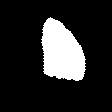

Frame 117 de Copia de 0X1B1798BF5669FB07.avi:


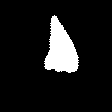

La máscara se ha guardado en /content/drive/Shareddrives/TC2007B Team 2 Bravo/Blue Leg/Mascaras
El frame se ha guardado en /content/drive/Shareddrives/TC2007B Team 2 Bravo/Blue Leg/Mascaras


In [11]:
#Probar la función con varios videos
frames = df[df["FileName"] == "0X1B1798BF5669FB07.avi"]
frames = frames["Frame"].unique()
mask_generation('Copia de 0X1B1798BF5669FB07.avi',frames,'/content/drive/Shareddrives/TC2007B Team 2 Bravo/Blue Leg/Video/')

Frame 46 de 0X100009310A3BD7FC.avi:


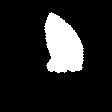

Frame 61 de 0X100009310A3BD7FC.avi:


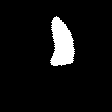

La máscara se ha guardado en /content/drive/Shareddrives/TC2007B Team 2 Bravo/Blue Leg/Mascaras
El frame se ha guardado en /content/drive/Shareddrives/TC2007B Team 2 Bravo/Blue Leg/Mascaras


In [12]:
frames = df[df["FileName"] == "0X100009310A3BD7FC.avi"]
frames = frames["Frame"].unique()
mask_generation("0X100009310A3BD7FC.avi",frames,'/content/drive/Shareddrives/TC2007B Team 2 Bravo/Blue Leg/Videos incompletos')

Frame 63 de 0X1A2A76BDB5B98BED.avi:


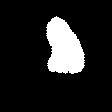

Frame 78 de 0X1A2A76BDB5B98BED.avi:


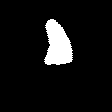

La máscara se ha guardado en /content/drive/Shareddrives/TC2007B Team 2 Bravo/Blue Leg/Mascaras
El frame se ha guardado en /content/drive/Shareddrives/TC2007B Team 2 Bravo/Blue Leg/Mascaras


In [13]:
frames = df[df["FileName"] == "0X1A2A76BDB5B98BED.avi"]
frames = frames["Frame"].unique()
mask_generation("0X1A2A76BDB5B98BED.avi",frames,'/content/drive/Shareddrives/TC2007B Team 2 Bravo/Blue Leg/Videos incompletos')

Frame 52 de 0X1A030EFDD45062FA.avi:


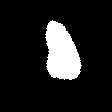

Frame 70 de 0X1A030EFDD45062FA.avi:


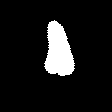

La máscara se ha guardado en /content/drive/Shareddrives/TC2007B Team 2 Bravo/Blue Leg/Mascaras
El frame se ha guardado en /content/drive/Shareddrives/TC2007B Team 2 Bravo/Blue Leg/Mascaras


In [14]:
frames = df[df["FileName"] == "0X1A030EFDD45062FA.avi"]
frames = frames["Frame"].unique()
mask_generation("0X1A030EFDD45062FA.avi",frames,'/content/drive/Shareddrives/TC2007B Team 2 Bravo/Blue Leg/Video')

Frame 3 de Copia de 0X1A05829AEDF6C65.avi:


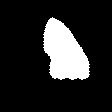

Frame 24 de Copia de 0X1A05829AEDF6C65.avi:


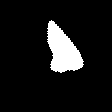

La máscara se ha guardado en /content/drive/Shareddrives/TC2007B Team 2 Bravo/Blue Leg/Mascaras
El frame se ha guardado en /content/drive/Shareddrives/TC2007B Team 2 Bravo/Blue Leg/Mascaras


In [15]:
frames = df[df["FileName"] == "0X1A05829AEDF6C65.avi"]
frames = frames["Frame"].unique()
mask_generation("Copia de 0X1A05829AEDF6C65.avi",frames,'/content/drive/Shareddrives/TC2007B Team 2 Bravo/Blue Leg/Video')

Frame 48 de Copia de 0X1A05DFFFCAFB253B.avi:


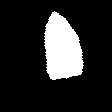

Frame 68 de Copia de 0X1A05DFFFCAFB253B.avi:


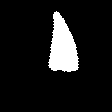

La máscara se ha guardado en /content/drive/Shareddrives/TC2007B Team 2 Bravo/Blue Leg/Mascaras
El frame se ha guardado en /content/drive/Shareddrives/TC2007B Team 2 Bravo/Blue Leg/Mascaras
Frame 110 de Copia de 0X1A09BE7969DA1508.avi:


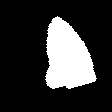

Frame 124 de Copia de 0X1A09BE7969DA1508.avi:


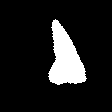

La máscara se ha guardado en /content/drive/Shareddrives/TC2007B Team 2 Bravo/Blue Leg/Mascaras
El frame se ha guardado en /content/drive/Shareddrives/TC2007B Team 2 Bravo/Blue Leg/Mascaras
Frame 72 de Copia de 0X1A0A263B22CCD966.avi:


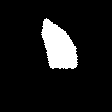

Frame 83 de Copia de 0X1A0A263B22CCD966.avi:


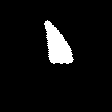

La máscara se ha guardado en /content/drive/Shareddrives/TC2007B Team 2 Bravo/Blue Leg/Mascaras
El frame se ha guardado en /content/drive/Shareddrives/TC2007B Team 2 Bravo/Blue Leg/Mascaras
Frame 124 de Copia de 0X1A1891A9F821324E.avi:


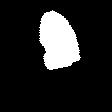

Frame 140 de Copia de 0X1A1891A9F821324E.avi:


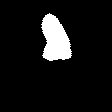

La máscara se ha guardado en /content/drive/Shareddrives/TC2007B Team 2 Bravo/Blue Leg/Mascaras
El frame se ha guardado en /content/drive/Shareddrives/TC2007B Team 2 Bravo/Blue Leg/Mascaras
Frame 50 de Copia de 0X1A193199E812B948.avi:


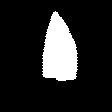

Frame 65 de Copia de 0X1A193199E812B948.avi:


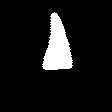

La máscara se ha guardado en /content/drive/Shareddrives/TC2007B Team 2 Bravo/Blue Leg/Mascaras
El frame se ha guardado en /content/drive/Shareddrives/TC2007B Team 2 Bravo/Blue Leg/Mascaras


In [16]:
#Generar las máscaras faltantes de los 10 videos
videos = ["Copia de 0X1A05DFFFCAFB253B.avi", "Copia de 0X1A09BE7969DA1508.avi","Copia de 0X1A0A263B22CCD966.avi", "Copia de 0X1A1891A9F821324E.avi","Copia de 0X1A193199E812B948.avi"]

for video in videos:
  filename_df = video.replace("Copia de ","")
  frames = df[df["FileName"] == filename_df]
  frames = frames["Frame"].unique()
  mask_generation(video,frames,'/content/drive/Shareddrives/TC2007B Team 2 Bravo/Blue Leg/Video')

In [17]:
#!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models

# Ruta a la carpeta que contiene las máscaras en formato JPG
ruta_carpeta_mascaras = '/content/drive/Shareddrives/TC2007B Team 2 Bravo/Blue Leg/Mascaras'

# Crear una lista para almacenar las rutas de las máscaras
lista_mascaras = []

# Iterar a través de los archivos en la carpeta de máscaras
for nombre_archivo in os.listdir(ruta_carpeta_mascaras):
    # Verificar si el archivo es una máscara (por ejemplo, verificar la extensión)
    if nombre_archivo.endswith('.jpg'):
        # Crear la ruta completa al archivo y agregarlo a la lista
        ruta_mascara = os.path.join(ruta_carpeta_mascaras, nombre_archivo)
        lista_mascaras.append(ruta_mascara)

# Crear una lista para almacenar las imágenes de las máscaras
mascaras = []

# Cargar las máscaras y ajustarlas según sea necesario
for ruta_mascara in lista_mascaras:
    mascara = cv2.imread(ruta_mascara)
    mascara = cv2.cvtColor(mascara, cv2.COLOR_BGR2GRAY)  # Convert the image to grayscale
    mascara = np.expand_dims(mascara, axis=-1)  # Add an extra dimension for the channel
    # mascara = cv2.resize(mascara, (ancho_deseado, alto_deseado))  # Ajustar al tamaño deseado
    mascara = mascara / 255.0  #normlizar las imagenes oara simplificar el procesamiento de la red neuronal (cambiar los pixeles a valores entre 0 y 1)
    mascaras.append(mascara)

# Convierte la lista de máscaras en un arreglo NumPy
mascaras = np.array(mascaras)

print(mascaras.shape)
'''
height, width = 112, 112
mascaras = mascaras.reshape(mascaras.shape[0], height * width)

print(mascaras.shape)'''


(20, 112, 112, 1)


'\nheight, width = 112, 112\nmascaras = mascaras.reshape(mascaras.shape[0], height * width)\n\nprint(mascaras.shape)'

In [18]:
# Ruta a la carpeta que contiene las imágenes en formato JPG
ruta_carpeta_frames = '/content/drive/Shareddrives/TC2007B Team 2 Bravo/Blue Leg/Frames'

# Crear una lista para almacenar las rutas de las máscaras
lista_frames = []

#Guardar cada mascara en la lista
for archivo in os.listdir(ruta_carpeta_frames):
  if archivo.endswith(".jpg"):
    archivo_frame = os.path.join(ruta_carpeta_frames,archivo)
    img = cv2.imread(archivo_frame)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convertir la imagen a formato RGB
    img = np.expand_dims(img, axis=-1)  # Add an extra dimension for the channel
    img = img/255.0 #normlizar las imagenes para simplificar el procesamiento de la red neuronal (cambiar los pixeles a valores entre 0 y 1)
    lista_frames.append(img)

lista_frames = np.array(lista_frames)

print(lista_frames.shape)

(20, 112, 112, 1)


## Sequential
Construir una red con pura convolución, no usar flatten ni dense.